<a href="https://colab.research.google.com/github/lee-seong-wook/ML-DL-study/blob/main/%ED%98%BC%EA%B3%B5%ED%8C%8C_LSTM%EA%B3%BC_GRU_%EC%85%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target) = imdb.load_data( num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [ ]:

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)


In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data = (val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

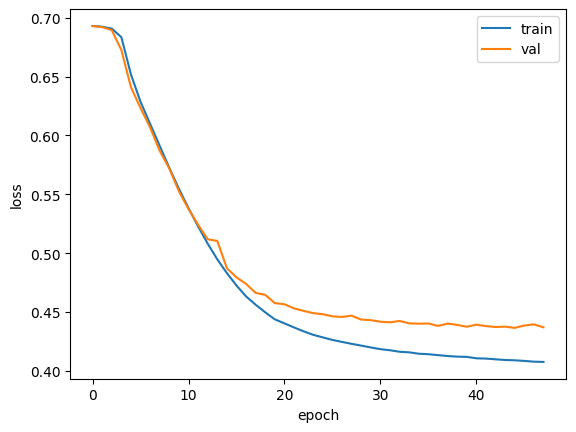

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data = (val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 25ms/step - loss: 0.4055 - accuracy: 0.8155 - val_loss: 0.4377 - val_accuracy: 0.7938
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.4047 - accuracy: 0.8155 - val_loss: 0.4357 - val_accuracy: 0.7960
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.4043 - accuracy: 0.8161 - val_loss: 0.4354 - val_accuracy: 0.8020
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.4041 - accuracy: 0.8155 - val_loss: 0.4363 - val_accuracy: 0.7948
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.4039 - accuracy: 0.8167 - val_loss: 0.4332 - val_accuracy: 0.7998
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.4032 - accuracy: 0.8163 - val_loss: 0.4329 - val_accuracy: 0.7966
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4032 - accuracy: 0.8147 - val_loss: 0.4329 - val_accuracy: 0.7

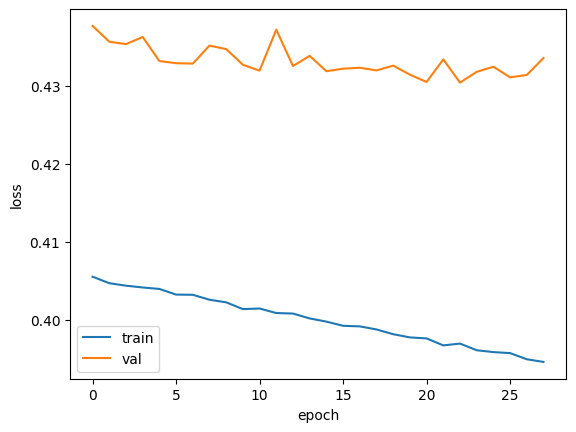

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()